In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from references.state_mapping import STATE_DISTRICT_MAPPING

pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", "{:,.2f}".format)

In [182]:
raw = pd.read_csv(
    "data/processed/readable_transaction_01_09_2025.csv", 
    na_values=["","-","   "],
    parse_dates=["Month, Year of Transaction Date"],
    date_format="%d/%m/%Y"
    )
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Property Type                    383584 non-null  object        
 1   District                         383584 non-null  object        
 2   Mukim                            383584 non-null  object        
 3   Scheme Name/Area                 383584 non-null  object        
 4   Road Name                        283469 non-null  object        
 5   Month, Year of Transaction Date  383584 non-null  datetime64[ns]
 6   Tenure                           383584 non-null  object        
 7   Land/Parcel Area                 383584 non-null  float64       
 8   Unit                             383584 non-null  object        
 9   Main Floor Area                  283477 non-null  float64       
 10  Unit                             283477 non-

In [183]:
raw.head()

,Property Type,District,Mukim,Scheme Name/Area,Road Name,"Month, Year of Transaction Date",Tenure,Land/Parcel Area,Unit,Main Floor Area,Unit,Unit Level,Transaction Price
0,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Bdr Masjid Tanah,TMN BUKIT INDAH FASA 2,JLN BUKIT INDAH 6,2024-03-01,Freehold,374.00,sq.m,106.00,sq.m,,470000
1,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN BELIMBING HARMONI,JLN BELIMBING HARMONI,2023-05-01,Leasehold,234.00,sq.m,67.00,sq.m,,483000
2,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,2021-04-01,Freehold,268.00,sq.m,118.00,sq.m,,359000
3,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,2021-04-01,Freehold,268.00,sq.m,118.00,sq.m,,435000
4,1 - 1 1/2 Storey Semi-Detached,Alor Gajah,Belimbing,TMN VISTA BELIMBING,JALAN DURIAN TUNGGAL-ALOR GAJAH,2021-04-01,Freehold,297.00,sq.m,118.00,sq.m,,373000


In [184]:
# Formatting/Cleaning Column Names
cols = raw.columns.str.strip().str.replace(" ","_").str.lower().str.replace(",","").str.replace("/","_or_")
print(cols)
data = raw.copy()
data.columns = cols
data.sample()

Index(['property_type', 'district', 'mukim', 'scheme_name_or_area',
       'road_name', 'month_year_of_transaction_date', 'tenure',
       'land_or_parcel_area', 'unit', 'main_floor_area', 'unit', 'unit_level',
       'transaction_price'],
      dtype='object')


,property_type,district,mukim,scheme_name_or_area,road_name,month_year_of_transaction_date,tenure,land_or_parcel_area,unit,main_floor_area,unit,unit_level,transaction_price
326502,Flat,Penampang,Penampang,VISTA SERI KIRANAU,NaN,2022-06-01,Leasehold,69.68,sq.m,NaN,NaN,1,250000


In [185]:
# Rename some columns
data = data.rename(columns={"month_year_of_transaction_date": "date", "transaction_price": "price"})

In [186]:
# Inspecting `unit` column 
print(data.iloc[:,8].unique())
print(data.iloc[:,10].unique())

# Dropping unit column as they are the same with the exception of missing data denoted by `-`
data = data.drop(columns="unit")
data.info()

['sq.m']
['sq.m' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   property_type        383584 non-null  object        
 1   district             383584 non-null  object        
 2   mukim                383584 non-null  object        
 3   scheme_name_or_area  383584 non-null  object        
 4   road_name            283469 non-null  object        
 5   date                 383584 non-null  datetime64[ns]
 6   tenure               383584 non-null  object        
 7   land_or_parcel_area  383584 non-null  float64       
 8   main_floor_area      283477 non-null  float64       
 9   unit_level           383584 non-null  object        
 10  price                383584 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 32.2+ MB


In [187]:
# Missing data analysis
print(data.isna().sum())
rows_missing = data[data.isna().any(axis=1)]
rows_missing.sample(5)

property_type               0
district                    0
mukim                       0
scheme_name_or_area         0
road_name              100115
date                        0
tenure                      0
land_or_parcel_area         0
main_floor_area        100107
unit_level                  0
price                       0
dtype: int64


,property_type,district,mukim,scheme_name_or_area,road_name,date,tenure,land_or_parcel_area,main_floor_area,unit_level,price
350749,Low-Cost Flat,Seberang Perai Utara,12,TMN DESA SENA,NaN,2023-03-01,Freehold,50.00,NaN,2,70000
277097,Condominium/Apartment,Kuala Lumpur,Mukim Setapak,RESIDENSI ASCENDA,NaN,2022-09-01,Leasehold,93.00,NaN,16,580000
250783,Condominium/Apartment,Hulu Langat,Cheras,VINA VERSATILE HOMES,NaN,2022-04-01,Freehold,116.12,NaN,22,480000
328190,Flat,Petaling,Petaling,"TMN LESTARI PERDANA , PETALING",NaN,2023-12-01,Leasehold,57.69,NaN,1,130000
301389,Condominium/Apartment,Timur Laut,Tanjung Tokong,MARINOX SKY VILLAS,NaN,2022-04-01,Leasehold,161.00,NaN,30,900000


In [188]:
# The rows with missing data are typically multi level apartments, the roads are also likely shared. 
# The missing data likely will have minial impact on the analysis.
rows_missing.property_type.unique()

array(['1 - 1 1/2 Storey Terraced', 'Condominium/Apartment', 'Detached',
       'Flat', 'Low-Cost Flat', 'Town House'], dtype=object)

In [189]:
data["district"].unique()

array(['Alor Gajah', 'Bachok', 'Bagan Datuk', 'Bahagian Betong',
       'Bahagian Bintulu', 'Bahagian Kapit', 'Bahagian Kuching',
       'Bahagian Limbang', 'Bahagian Miri', 'Bahagian Mukah',
       'Bahagian Samarahan', 'Bahagian Sarikei', 'Bahagian Serian',
       'Bahagian Sibu', 'Bahagian Sri Aman', 'Baling', 'Bandar Baru',
       'Barat Daya', 'Batang Padang', 'Batu Pahat', 'Beaufort', 'Bentong',
       'Bera', 'Besut', 'Cameron Highland', 'Dungun', 'Gombak',
       'Gua Musang', 'Hilir Perak', 'Hulu Langat', 'Hulu Perak',
       'Hulu Selangor', 'Hulu Terengganu', 'Jasin', 'Jelebu', 'Jeli',
       'Jempol', 'Jerantut', 'Johor Bahru', 'Kampar', 'Kemaman',
       'Keningau', 'Kerian', 'Kinta', 'Klang', 'Kluang', 'Kota Bahru',
       'Kota Belud', 'Kota Kinabalu', 'Kota Marudu', 'Kota Setar',
       'Kota Tinggi', 'Kuala Kangsar', 'Kuala Krai', 'Kuala Langat',
       'Kuala Lumpur', 'Kuala Muda', 'Kuala Nerus', 'Kuala Pilah',
       'Kuala Selangor', 'Kuala Terengganu', 'Kuantan', '

In [190]:
# Renaming `RoMPin` in district column to `Rompin`
print(data.query("district == 'RoMPin'").head(2))
data["district"] = data["district"].replace("RoMPin", "Rompin")

         property_type district   mukim  scheme_name_or_area        road_name  \
376384  Low-Cost House   RoMPin   Bebar  PPR(M) DESA CEMPAKA     DESA CEMPAKA   
376385  Low-Cost House   RoMPin   Bebar  PPR(M) DESA CEMPAKA  JALAN CEMPAKA 1   

             date     tenure  land_or_parcel_area  main_floor_area unit_level  \
376384 2022-05-01  Leasehold               122.00            63.00              
376385 2022-05-01  Leasehold               122.00            63.00              

         price  
376384  120000  
376385  140000  


In [191]:
data.query("district == 'Rompin'").sample(5)

,property_type,district,mukim,scheme_name_or_area,road_name,date,tenure,land_or_parcel_area,main_floor_area,unit_level,price
92981,1 - 1 1/2 Storey Terraced,Rompin,Endau,PERUMAHAN GEN BAHARU FELDA SELENDANG 2,JALAN RAJAWALI,2021-08-01,Leasehold,130.00,76.00,,90000
93315,1 - 1 1/2 Storey Terraced,Rompin,Keratong,PER. GENERASI BAHARU FELDA SELANCAR 4/5,JALAN SELANCAR INDAH 2,2023-10-01,Leasehold,"16,258.00",77.00,,95000
93064,1 - 1 1/2 Storey Terraced,Rompin,Rompin,TAMAN NUSA PUTERI,LRG NUSA PUTERI 5,2023-03-01,Leasehold,121.00,67.00,,80000
93347,1 - 1 1/2 Storey Terraced,Rompin,Keratong,PER. GENERASI BAHARU FELDA SELANCAR 4/5,JALAN SELANCAR INDAH 8,2023-12-01,Leasehold,130.06,77.00,,90000
93267,1 - 1 1/2 Storey Terraced,Rompin,Keratong,PER GENERASI BAHARU FELDA KERATONG 4,JALAN KERATONG PERMAI 3,2023-12-01,Leasehold,130.06,77.00,,90000


In [192]:
state = data["district"].map(STATE_DISTRICT_MAPPING)
data.insert(1,"state",state)
data.sample(5)

,property_type,state,district,mukim,scheme_name_or_area,road_name,date,tenure,land_or_parcel_area,main_floor_area,unit_level,price
19191,1 - 1 1/2 Storey Semi-Detached,Pahang,Temerloh,Jenderak,PERUMAHAN MAKMUR BUKIT LADA,JLN PMBL 6,2023-06-01,Leasehold,260.10,99.00,,260000
119427,2 - 2 1/2 Storey Semi-Detached,Pulau Pinang,Seberang Perai Tengah,14,TAMAN SANTUARI (SANTUARY GARDEN),LRG SANTUARI 19,2023-11-01,Freehold,240.00,186.00,,860000
105126,2 - 2 1/2 Storey Semi-Detached,Sarawak,Bahagian Kuching,Bahagian Kuching,PHEONIX PARK,JALAN BATU KAWA,2023-02-01,Leasehold,311.30,124.00,,900000
332125,Flat,Pulau Pinang,Timur Laut,Georgetown,GREEN LANE HEIGHTS BLOK C,NaN,2021-12-01,Freehold,65.00,NaN,11,330000
130694,2 - 2 1/2 Storey Terraced,Selangor,Gombak,Pekan Templer,SETIA ECO TEMPLER,JALAN SET 1/3,2021-10-01,Leasehold,178.00,222.00,,1040000


In [193]:
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")

In [ ]:
# Persist the Results
# data.to_csv("data/processed/processed_data.csv", index=False)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   property_type        383584 non-null  object        
 1   state                383584 non-null  object        
 2   district             383584 non-null  object        
 3   mukim                383584 non-null  object        
 4   scheme_name_or_area  383584 non-null  object        
 5   road_name            283469 non-null  object        
 6   date                 383584 non-null  datetime64[ns]
 7   tenure               383584 non-null  object        
 8   land_or_parcel_area  383584 non-null  float64       
 9   main_floor_area      283477 non-null  float64       
 10  unit_level           383584 non-null  object        
 11  price                383584 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 35.1

## Starting Analysis
- mean/median price by state and property type
- tenure and highest property type counts
- transaction counts across time by state, and property type
- correlation between floor area and price

In [196]:
data.describe()

,date,land_or_parcel_area,main_floor_area,price
count,383584,"383,584.00","283,477.00","383,584.00"
mean,2023-03-04 21:49:19.706348288,192.62,127.79,"496,467.24"
min,2021-01-01 00:00:00,8.27,0.00,"5,000.00"
25%,2022-06-01 00:00:00,100.00,80.00,"248,000.00"
50%,2023-03-01 00:00:00,130.00,110.00,"370,000.00"
75%,2024-01-01 00:00:00,188.00,158.00,"570,000.00"
max,2025-03-01 00:00:00,"1,788,888.00","159,390.00","38,000,000.00"
std,NaN,"4,166.07",315.35,"545,792.88"


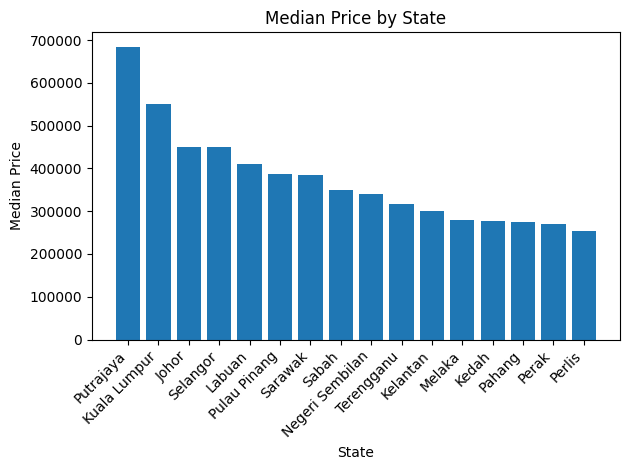

In [197]:
median_price_state = data[["state", "price"]].groupby("state").median().sort_values("price", ascending=False)
plt.bar(median_price_state.index, median_price_state["price"])
plt.xticks(rotation=45, ha="right")  # rotate 45°, align to the right
plt.ylabel("Median Price")
plt.xlabel("State")
plt.title("Median Price by State")
plt.tight_layout()
plt.show()

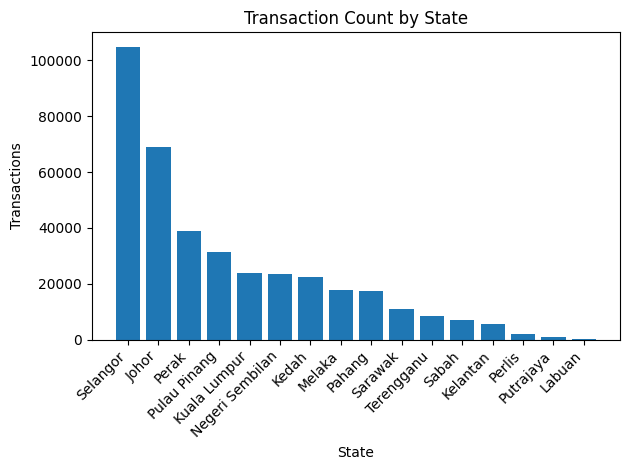

In [198]:
transaction_count_state = data[["state", "price"]].groupby("state").count().sort_values("price", ascending=False)
plt.bar(transaction_count_state.index, transaction_count_state["price"])
plt.xticks(rotation=45, ha="right")  # rotate 45°, align to the right
plt.ylabel("Transactions")
plt.xlabel("State")
plt.title("Transaction Count by State")
plt.tight_layout()
plt.show()

C:\Users\faisa\AppData\Local\Temp\ipykernel_23440\2675027391.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(median_price_state.index, rotation=45, ha="right")


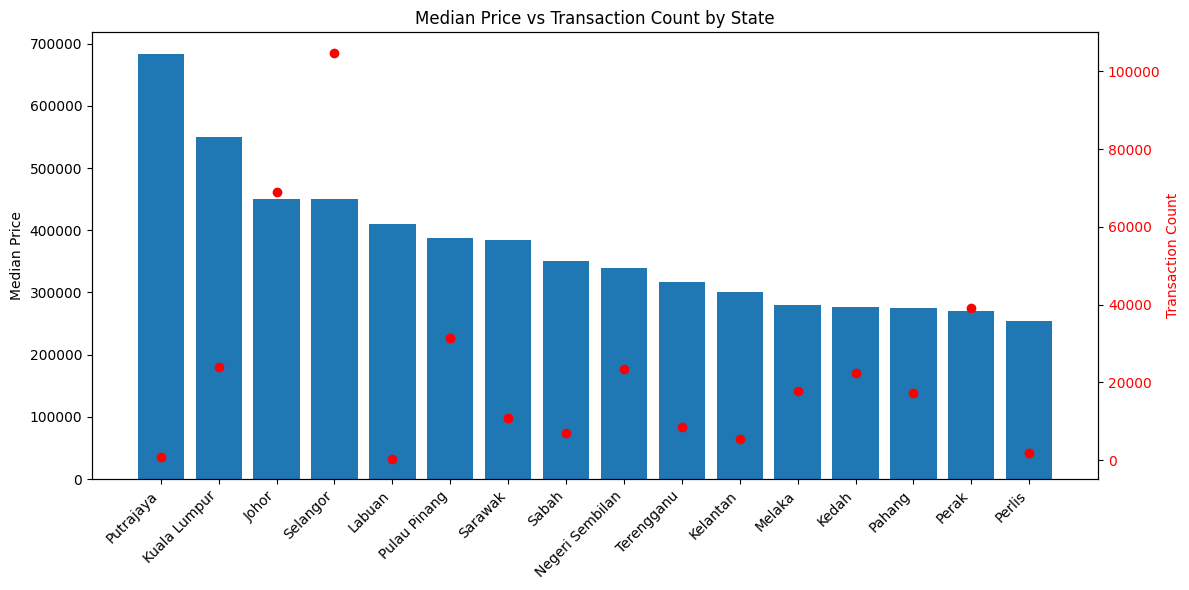

In [199]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(median_price_state.index, median_price_state["price"])
ax1.set_ylabel("Median Price")
ax1.tick_params(axis="y")
ax1.set_xticklabels(median_price_state.index, rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.scatter(transaction_count_state.index, transaction_count_state["price"], color="red", marker="o")
ax2.set_ylabel("Transaction Count", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Median Price vs Transaction Count by State")
plt.tight_layout()
plt.show()

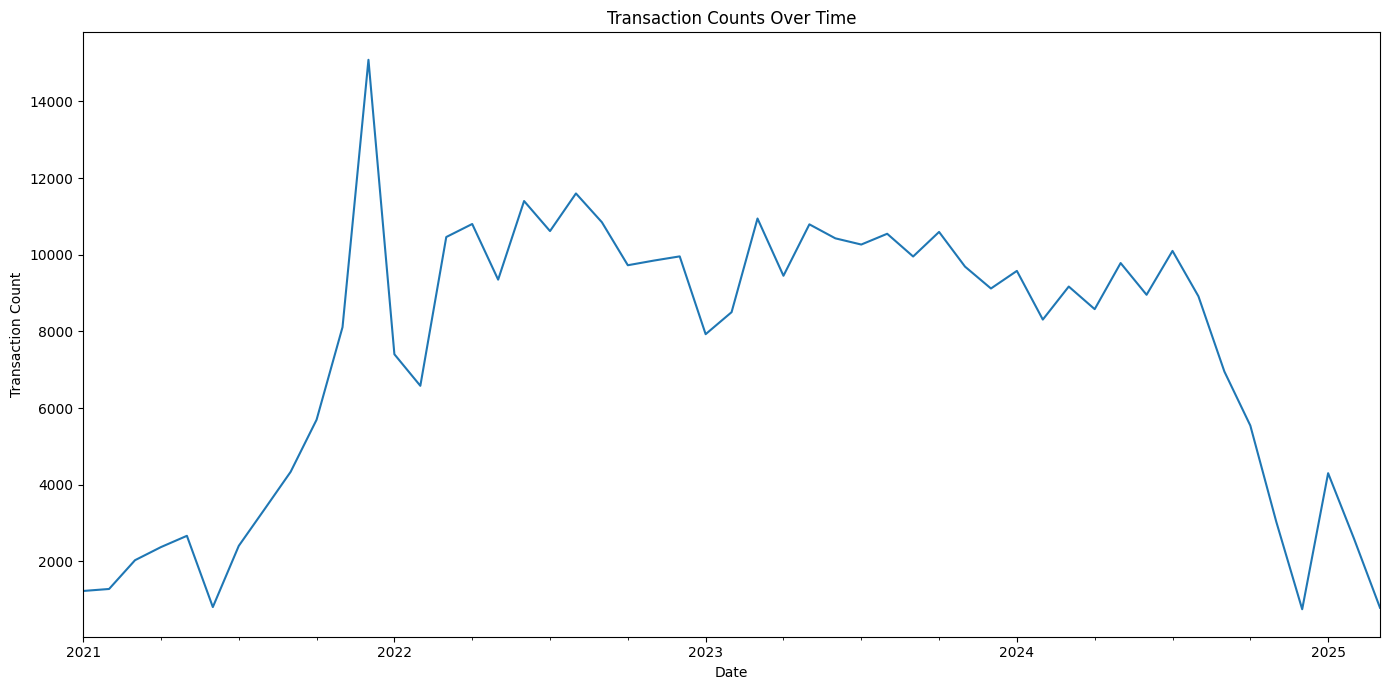

In [200]:
transaction_count_date = data.groupby(["date"]).count()["price"]
transaction_count_date.plot(figsize=(14,7))

plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.title("Transaction Counts Over Time")

plt.xticks(rotation=45, minor=True)
plt.tight_layout()
plt.show()

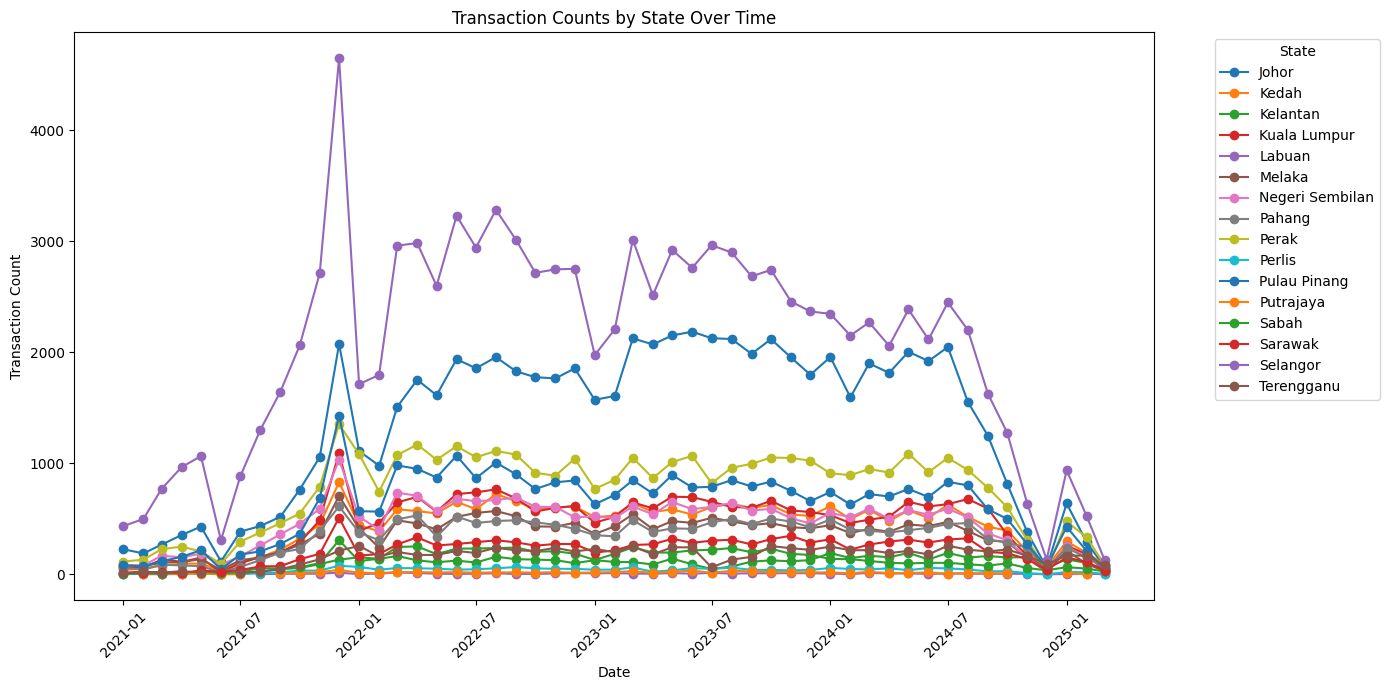

In [201]:
transaction_count_state_date = data.groupby(["date","state"], as_index=False).count()[["date","state","price"]]
pivot_data = transaction_count_state_date.pivot(index="date", columns="state", values="price")

plt.figure(figsize=(14,7))
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], marker="o", label=state)

plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.title("Transaction Counts by State Over Time")
plt.xticks(rotation=45)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()